In [1]:
from importlib import reload

import io
import pathlib
import numpy as np
import pandas as pd

import fitsio
import matplotlib.pyplot as plt
import pyds9

In [2]:
import nirander
import hxstack as hx
reload(nirander)
reload(hx)

cam = 'n1'
meade = nirander.NirIlluminator(forceLedOff=False)

2020-04-13 14:50:03.751Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fee566c7590>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [3]:
#d1085_92 = pyds9.DS9('disp4', start=True)
#d1085_112 = pyds9.DS9('disp5', start=True)
#d1085_122 = pyds9.DS9('disp6', start=True)
#d970_104 = pyds9.DS9('disp7', start=True)

d1 = pyds9.DS9('disp1', start=True)

In [176]:
s_1085_112 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    6988  33468  14179    112           0          0
1    6989  33468  14181    112           0          0
2    6990  33468  14183    112           0          0
3    6991  33473  14179    112           0          0
4    6992  33473  14181    112           0          0
5    6993  33473  14183    112           0          0
6    6994  33478  14179    112           0          0
7    6995  33478  14181    112           0          0
8    6996  33478  14183    112           0          0
9    6997  33468  14179    112           0          0
10   6998  33468  14181    112           0          0
11   6999  33468  14183    112           0          0
12   7000  33473  14179    112           0          0
13   7001  33473  14181    112           0          0
14   7002  33473  14183    112           0          0
15   7003  33478  14179    112           0          0
16   7004  33478  14181    112           0          0
17   7005  33478  14183    112           0          0
18   7006  33468  14179    112           0          0
19   7007  33468  14181    112           0          0
20   7008  33468  14183    112           0          0
21   7009  33473  14179    112           0          0
22   7010  33473  14181    112           0          0
23   7011  33473  14183    112           0          0
24   7012  33478  14179    112           0          0
25   7013  33478  14181    112           0          0
26   7014  33478  14183    112           0          0
27   7015  33468  14179    112           0          0
28   7016  33468  14181    112           0          0
29   7017  33468  14183    112           0          0
30   7018  33473  14179    112           0          0
31   7019  33473  14181    112           0          0
32   7020  33473  14183    112           0          0
33   7021  33478  14179    112           0          0
34   7022  33478  14181    112           0          0
35   7023  33478  14183    112           0          0
36   7024  33468  14179    112           0          0
37   7025  33468  14181    112           0          0
38   7026  33468  14183    112           0          0
39   7027  33473  14179    112           0          0
40   7028  33473  14181    112           0          0
41   7029  33473  14183    112           0          0
42   7030  33478  14179    112           0          0
43   7031  33478  14181    112           0          0
44   7032  33478  14183    112           0          0
"""

s_1085_92 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7033  33468  14179     92           0          0
1    7034  33468  14181     92           0          0
2    7035  33468  14183     92           0          0
3    7036  33473  14179     92           0          0
4    7037  33473  14181     92           0          0
5    7038  33473  14183     92           0          0
6    7039  33478  14179     92           0          0
7    7040  33478  14181     92           0          0
8    7041  33478  14183     92           0          0
9    7042  33468  14179     92           0          0
10   7043  33468  14181     92           0          0
11   7044  33468  14183     92           0          0
12   7045  33473  14179     92           0          0
13   7046  33473  14181     92           0          0
14   7047  33473  14183     92           0          0
15   7048  33478  14179     92           0          0
16   7049  33478  14181     92           0          0
17   7050  33478  14183     92           0          0
18   7051  33468  14179     92           0          0
19   7052  33468  14181     92           0          0
20   7053  33468  14183     92           0          0
21   7054  33473  14179     92           0          0
22   7055  33473  14181     92           0          0
23   7056  33473  14183     92           0          0
24   7057  33478  14179     92           0          0
25   7058  33478  14181     92           0          0
26   7059  33478  14183     92           0          0
27   7060  33468  14179     92           0          0
28   7061  33468  14181     92           0          0
29   7062  33468  14183     92           0          0
30   7063  33473  14179     92           0          0
31   7064  33473  14181     92           0          0
32   7065  33473  14183     92           0          0
33   7066  33478  14179     92           0          0
34   7067  33478  14181     92           0          0
35   7068  33478  14183     92           0          0
36   7069  33468  14179     92           0          0
37   7070  33468  14181     92           0          0
38   7071  33468  14183     92           0          0
39   7072  33473  14179     92           0          0
40   7073  33473  14181     92           0          0
41   7074  33473  14183     92           0          0
42   7075  33478  14179     92           0          0
43   7076  33478  14181     92           0          0
44   7077  33478  14183     92           0          0
"""

s_1085_122 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7078  33468  14179    132           0          0
1    7079  33468  14181    132           0          0
2    7080  33468  14183    132           0          0
3    7081  33473  14179    132           0          0
4    7082  33473  14181    132           0          0
5    7083  33473  14183    132           0          0
6    7084  33478  14179    132           0          0
7    7085  33478  14181    132           0          0
8    7086  33478  14183    132           0          0
9    7087  33468  14179    132           0          0
10   7088  33468  14181    132           0          0
11   7089  33468  14183    132           0          0
12   7090  33473  14179    132           0          0
13   7091  33473  14181    132           0          0
14   7092  33473  14183    132           0          0
15   7093  33478  14179    132           0          0
16   7094  33478  14181    132           0          0
17   7095  33478  14183    132           0          0
18   7096  33468  14179    132           0          0
19   7097  33468  14181    132           0          0
20   7098  33468  14183    132           0          0
21   7099  33473  14179    132           0          0
22   7100  33473  14181    132           0          0
23   7101  33473  14183    132           0          0
24   7102  33478  14179    132           0          0
25   7103  33478  14181    132           0          0
26   7104  33478  14183    132           0          0
27   7105  33468  14179    132           0          0
28   7106  33468  14181    132           0          0
29   7107  33468  14183    132           0          0
30   7108  33473  14179    132           0          0
31   7109  33473  14181    132           0          0
32   7110  33473  14183    132           0          0
33   7111  33478  14179    132           0          0
34   7112  33478  14181    132           0          0
35   7113  33478  14183    132           0          0
36   7114  33468  14179    132           0          0
37   7115  33468  14181    132           0          0
38   7116  33468  14183    132           0          0
39   7117  33473  14179    132           0          0
40   7118  33473  14181    132           0          0
41   7119  33473  14183    132           0          0
42   7120  33478  14179    132           0          0
43   7121  33478  14181    132           0          0
44   7122  33478  14183    132           0          0
"""

In [177]:
s_970_104 = """    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7220  52588   4703  104.5           0          0
1    7221  52588   4705  104.5           0          0
2    7222  52588   4707  104.5           0          0
3    7223  52588   4709  104.5           0          0
4    7224  52593   4703  104.5           0          0
5    7225  52593   4705  104.5           0          0
6    7226  52593   4707  104.5           0          0
7    7227  52593   4709  104.5           0          0
8    7228  52598   4703  104.5           0          0
9    7229  52598   4705  104.5           0          0
10   7230  52598   4707  104.5           0          0
11   7231  52598   4709  104.5           0          0
12   7232  52603   4703  104.5           0          0
13   7233  52603   4705  104.5           0          0
14   7234  52603   4707  104.5           0          0
15   7235  52603   4709  104.5           0          0
16   7236  52588   4703  104.5           0          0
17   7237  52588   4705  104.5           0          0
18   7238  52588   4707  104.5           0          0
19   7239  52588   4709  104.5           0          0
20   7240  52593   4703  104.5           0          0
21   7241  52593   4705  104.5           0          0
22   7242  52593   4707  104.5           0          0
23   7243  52593   4709  104.5           0          0
24   7244  52598   4703  104.5           0          0
25   7245  52598   4705  104.5           0          0
26   7246  52598   4707  104.5           0          0
27   7247  52598   4709  104.5           0          0
28   7248  52603   4703  104.5           0          0
29   7249  52603   4705  104.5           0          0
30   7250  52603   4707  104.5           0          0
31   7251  52603   4709  104.5           0          0
32   7252  52588   4703  104.5           0          0
33   7253  52588   4705  104.5           0          0
34   7254  52588   4707  104.5           0          0
35   7255  52588   4709  104.5           0          0
36   7256  52593   4703  104.5           0          0
37   7257  52593   4705  104.5           0          0
38   7258  52593   4707  104.5           0          0
39   7259  52593   4709  104.5           0          0
40   7260  52598   4703  104.5           0          0
41   7261  52598   4705  104.5           0          0
42   7262  52598   4707  104.5           0          0
43   7263  52598   4709  104.5           0          0
44   7264  52603   4703  104.5           0          0
45   7265  52603   4705  104.5           0          0
46   7266  52603   4707  104.5           0          0
47   7267  52603   4709  104.5           0          0
48   7268  52588   4703  104.5           0          0
49   7269  52588   4705  104.5           0          0
50   7270  52588   4707  104.5           0          0
51   7271  52588   4709  104.5           0          0
52   7272  52593   4703  104.5           0          0
53   7273  52593   4705  104.5           0          0
54   7274  52593   4707  104.5           0          0
55   7275  52593   4709  104.5           0          0
56   7276  52598   4703  104.5           0          0
57   7277  52598   4705  104.5           0          0
58   7278  52598   4707  104.5           0          0
59   7279  52598   4709  104.5           0          0
60   7280  52603   4703  104.5           0          0
61   7281  52603   4705  104.5           0          0
62   7282  52603   4707  104.5           0          0
63   7283  52603   4709  104.5           0          0
64   7284  52588   4703  104.5           0          0
65   7285  52588   4705  104.5           0          0
66   7286  52588   4707  104.5           0          0
67   7287  52588   4709  104.5           0          0
68   7288  52593   4703  104.5           0          0
69   7289  52593   4705  104.5           0          0
70   7290  52593   4707  104.5           0          0
71   7291  52593   4709  104.5           0          0
72   7292  52598   4703  104.5           0          0
73   7293  52598   4705  104.5           0          0
74   7294  52598   4707  104.5           0          0
75   7295  52598   4709  104.5           0          0
76   7296  52603   4703  104.5           0          0
77   7297  52603   4705  104.5           0          0
78   7298  52603   4707  104.5           0          0
79   7299  52603   4709  104.5           0          0
"""

In [200]:
frames_970_104 = pd.read_csv(io.StringIO(s_970_104), delimiter='\s+')
frames_970_104.wavelength = 970

frames_1085_112 = pd.read_csv(io.StringIO(s_1085_112), delimiter='\s+')
frames_1085_92 = pd.read_csv(io.StringIO(s_1085_92), delimiter='\s+')
frames_1085_122 = pd.read_csv(io.StringIO(s_1085_122), delimiter='\s+')
frames_1085_112.wavelength = 1085
frames_1085_92.wavelength = 1085
frames_1085_122.wavelength = 1085

In [332]:
newFrames

,visit,xstep,ystep,focus,wavelength,dutyCycle
0,8268,4395,3982,92.0,1300,100
1,8269,4395,3984,92.0,1300,100
2,8270,4395,3986,92.0,1300,100
3,8271,4400,3982,92.0,1300,100
4,8272,4400,3984,92.0,1300,100
...,...,...,...,...,...,...
1183,9451,21097,24912,137.0,1085,30
1184,9452,21097,24914,137.0,1085,30
1185,9453,21102,24910,137.0,1085,30
1186,9454,21102,24912,137.0,1085,30


In [32]:
reload(nirander)
newFrames1 = pd.read_csv('/data/pfsx/redux/n1/20200408/n1_dither_full/measures-008268-n1.txt', delimiter='\s+')
newFrames2 = pd.read_csv('/data/pfsx/redux/n1/20200410/n1_dither_full_2/measures-010401-n1.txt', delimiter='\s+')

newFrames1 = newFrames1[newFrames1.wavelength != 970]

newFrames = pd.concat([newFrames1, newFrames2], ignore_index=True).copy()

2020-04-13 20:10:57.345Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fee55872710>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [14]:
meade.leds

,wave,dutyCycle,focusOffset,position
wave,,,,
1300,1300,100.0,4.0,3984
1200,1200,33.0,0.0,3664
1085,1085,30.0,0.0,2700
1070,1070,33.0,0.0,2457
1050,1050,19.0,0.0,2274
970,970,83.0,0.0,846
930,930,40.0,-10.0,100


In [34]:
d1.set_np2arr(hxCalib.isr(visit=8316))

1

In [36]:
reload(nirander)
ret = []
for w in meade.leds.wave[:1]:
    print(f"measuring {w}")
    
    ret.append(nirander.measureSet(newFrames.loc[newFrames.wavelength == w].copy(), hxCalib, radius=80))
    

2020-04-13 20:29:45.011Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fee554bea90>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

measuring 1300
    : i=0, visit=8268
    : i=1, visit=8269
    : i=2, visit=8270
    : i=3, visit=8271
    : i=4, visit=8272
    : i=5, visit=8273
    : i=6, visit=8274
    : i=7, visit=8275
    : i=8, visit=8276
    : i=9, visit=8277
    : i=10, visit=8278
    : i=11, visit=8279
    : i=12, visit=8280
    : i=13, visit=8281
    : i=14, visit=8282
    : i=15, visit=8283
    : i=16, visit=8284
    : i=17, visit=8285
    : i=18, visit=8286
    : i=19, visit=8287
    : i=20, visit=8288
    : i=21, visit=8289
    : i=22, visit=8290
    : i=23, visit=8291
    : i=24, visit=8292
    : i=25, visit=8293
    : i=26, visit=8294
    : i=27, visit=8295
    : i=28, visit=8296
    : i=29, visit=8297
    : i=30, visit=8298
    : i=31, visit=8299
    : i=32, visit=8300
    : i=33, visit=8301
    : i=34, visit=8302
    : i=35, visit=8303
    : i=36, visit=8304
    : i=37, visit=8305
    : i=38, visit=8306
    : i=39, visit=8307
    : i=40, visit=8308
    : i=41, visit=8309
    : i=42, visit=8310
    : 

In [29]:
newFrames[newFrames.wavelength == 1200]

,visit,xstep,ystep,focus,wavelength,dutyCycle
405,8673,8664,3978,92.0,1200,33
406,8674,8664,3980,92.0,1200,33
407,8675,8664,3982,92.0,1200,33
408,8676,8669,3978,92.0,1200,33
409,8677,8669,3980,92.0,1200,33
...,...,...,...,...,...,...
805,9073,7561,24921,152.0,1200,33
806,9074,7561,24923,152.0,1200,33
807,9075,7566,24919,152.0,1200,33
808,9076,7566,24921,152.0,1200,33


In [15]:
from pfs.utils import butler
reload(butler)

import butlerMaps
reload(butlerMaps)

b = butler.Butler(configRoot='/data/pfsx/config')
b.addMaps(dataMapDict=butlerMaps.dataMap)
b.addKeys(butlerMaps.configKeys)
b.addKeys(dict(cam='n1', experimentName='n1_dither_full'))
b.addKeys(dict(reduxDir=b.get('reduxDir')))

2020-04-13 14:59:41.652Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fee558e8210>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [329]:
nfg = newFrames.groupby(['wavelength', 'focus'])
alldl = dict()
for name, g in nfg:
    print(f'{name} : {len(g)}')
    if g.wavelength.values[0] != 1200 or g.focus.values[0] != 107:
        continue
    dl = allDithers(g, hxCalib, butler=b)
    alldl[name] = dl
#dl

(1085, 92.0) : 81
(1085, 107.0) : 54
(1085, 122.0) : 54
(1085, 137.0) : 54
(1085, 152.0) : 54
(1200, 92.0) : 81
9
8673: wave: 1200.0 focus: 92.0 pix: 0 2 step: 8664,3978 ctr: 3676.99,91.85
8674: wave: 1200.0 focus: 92.0 pix: 0 1 step: 8664,3980 ctr: 3677.00,92.22
8675: wave: 1200.0 focus: 92.0 pix: 0 0 step: 8664,3982 ctr: 3677.00,92.53
8676: wave: 1200.0 focus: 92.0 pix: 1 2 step: 8669,3978 ctr: 3676.57,91.74
8677: wave: 1200.0 focus: 92.0 pix: 1 1 step: 8669,3980 ctr: 3676.58,92.07
8678: wave: 1200.0 focus: 92.0 pix: 1 0 step: 8669,3982 ctr: 3676.58,92.41
8679: wave: 1200.0 focus: 92.0 pix: 2 2 step: 8674,3978 ctr: 3676.22,91.68
8680: wave: 1200.0 focus: 92.0 pix: 2 1 step: 8674,3980 ctr: 3676.23,92.05
8681: wave: 1200.0 focus: 92.0 pix: 2 0 step: 8674,3982 ctr: 3676.21,92.39
9
8682: wave: 1200.0 focus: 92.0 pix: 0 2 step: 8664,3978 ctr: 3676.84,91.67
8683: wave: 1200.0 focus: 92.0 pix: 0 1 step: 8664,3980 ctr: 3676.86,92.00
8684: wave: 1200.0 focus: 92.0 pix: 0 0 step: 8664,3982 ctr

KeyboardInterrupt: 

In [207]:
def measureFrames(frames, hxCalib):
    ctr = meade.stepsToPix(*frames[['xstep', 'ystep']].values[0])
    _ = nirander.measureSet(frames, hxCalib, thresh=500, center=[ctr])

In [208]:
measureFrames(frames_970_104, hxCalib)

got 2 spots near [(3663.62146715057, 250.14568719837735)]
got 2 spots near [(3663.62146715057, 250.14568719837735)]
got 2 spots near [(3663.62146715057, 250.14568719837735)]


In [59]:
ii = (frames.xstep == frames.xstep.min()) & (frames.ystep == frames.ystep.min())
frames.loc[ii]

,visit,xstep,ystep,focus,wavelength,dutyCycle,x2,y2,xpix,ypix,flux,peak,size
0,6988,33468,14179,112,1085,0,1.052827,1.033460,2279.663273,2039.950532,63814.269531,17551.238281,1.043143
9,6997,33468,14179,112,1085,0,1.121083,1.095472,2279.601860,2039.967770,74873.171875,18189.486328,1.108278
18,7006,33468,14179,112,1085,0,1.117315,1.124604,2279.524239,2039.951836,77261.148438,17595.437500,1.120959
27,7015,33468,14179,112,1085,0,1.115913,1.161145,2279.437440,2039.948916,78293.039062,19068.226562,1.138529
36,7024,33468,14179,112,1085,0,1.127703,1.166001,2279.365264,2039.942262,78408.804688,19913.638672,1.146852


In [16]:
def dither(frames, hxCalib, rad=10):
    scale = 3
    xsteps = frames['xstep'].unique()
    ysteps = frames['ystep'].unique()
    
    xoffsets = {xs:xi for xi,xs in enumerate(xsteps)}
    yoffsets = {ys:2-yi for yi,ys in enumerate(ysteps)}
    # Need better sanity checks
    if len(frames) != scale*scale or len(xsteps) != scale or len(ysteps) != scale:
        raise ValueError("only want to deal with 3x3 dithers")
        
    im0 = hxCalib.isr(frames['visit'].values[0])
    ctr =  frames[['xpix','ypix']].values[0].astype('i4')
    xslice = slice(ctr[0]-rad, ctr[0]+rad)
    yslice = slice(ctr[1]-rad, ctr[1]+rad)
    
    outIm = np.zeros((rad*2*scale, rad*2*scale), dtype='f4')
    outIms = []
    for fIdx in frames.index:
        f1 = frames.loc[fIdx]
        im = hxCalib.isr(f1.visit)
        im = im[yslice,xslice]
        xoff = xoffsets[f1.xstep]
        yoff = yoffsets[f1.ystep]
        print(f'{f1.visit:0.0f}: wave: {f1.wavelength} focus: {f1.focus} pix: {xoff} {yoff} step: {f1.xstep:0.0f},{f1.ystep:0.0f} ctr: {f1.xpix:0.2f},{f1.ypix:0.2f}')
        outIm[yoff::scale, xoff::scale] = im
        
    return outIm

def allDithers(frames, hxCalib, rad=15, butler=None):
    dithers = []
    for i in range(len(frames)//9):
        dithFrames = frames.iloc[i*9:(i+1)*9]
        print(len(dithFrames))
        dith1 = dither(dithFrames, hxCalib, rad=rad)
        dithers.append(dith1)
        
        if butler is not None:
            row = dithFrames.iloc[0]
            path = butler.get('dither', 
                              idDict=dict(visit=int(row.visit),
                                          wave=int(row.wavelength),
                                          focus=row.focus,
                                          row=(np.round(row.ypix/100)*100)))
            hdr = [dict(name='VISIT', value=int(row.visit), comment="visit of 0,0 image"),
                   dict(name='WAVE', value=row.wavelength),                   
                   dict(name='FOCUS', value=row.focus),
                   dict(name='XPIX', value=row.xpix, comment="measured xc of 0,0 image"),
                   dict(name='YPIX', value=row.ypix, comment="measured yc of 0,0 image"),
                   dict(name='XSTEP', value=row.xstep),
                   dict(name='YSTEP', value=row.ystep),
                   dict(name='SIZE', value=row.size, comment="measured RMS of 0,0 image"),
                   dict(name='FLUX', value=row.flux, comment="measured total flux of 0,0 image"),
                   dict(name='PEAK', value=row.peak, comment="measured peak of 0,0 image")]
            fitsio.write(path, dith1, header=hdr, clobber=True)
                   
    return dithers

In [244]:
sf970 = frames_970_104[(frames_970_104.ystep != 4709) & (frames_970_104.xstep != 52603)].reset_index()
len(sf970)

45

In [152]:
ddith = [dithers[i+1]-dithers[i] for i in range(len(dithers)-1)]

In [245]:
dithers_970_104 = allDithers(sf970, hxCalib)

9
7220: pix: 2 2 step: 52588,4703 ctr: 3723.17,241.50
7221: pix: 2 1 step: 52588,4705 ctr: 3723.18,241.80
7222: pix: 2 0 step: 52588,4707 ctr: 3723.17,242.11
7224: pix: 1 2 step: 52593,4703 ctr: 3724.07,241.05
7225: pix: 1 1 step: 52593,4705 ctr: 3723.97,241.44
7226: pix: 1 0 step: 52593,4707 ctr: 3723.90,241.74
7228: pix: 0 2 step: 52598,4703 ctr: 3724.42,240.97
7229: pix: 0 1 step: 52598,4705 ctr: 3724.39,241.35
7230: pix: 0 0 step: 52598,4707 ctr: 3724.45,241.67
9
7236: pix: 2 2 step: 52588,4703 ctr: 3724.07,240.96
7237: pix: 2 1 step: 52588,4705 ctr: 3723.96,241.38
7238: pix: 2 0 step: 52588,4707 ctr: 3723.88,241.66
7240: pix: 1 2 step: 52593,4703 ctr: 3724.30,240.90
7241: pix: 1 1 step: 52593,4705 ctr: 3724.26,241.29
7242: pix: 1 0 step: 52593,4707 ctr: 3724.26,241.57
7244: pix: 0 2 step: 52598,4703 ctr: 3724.61,240.90
7245: pix: 0 1 step: 52598,4705 ctr: 3724.63,241.25
7246: pix: 0 0 step: 52598,4707 ctr: 3724.63,241.60
9
7252: pix: 2 2 step: 52588,4703 ctr: 3724.17,240.85
7253: 

In [243]:
%debug

> <ipython-input-222-8429018134ff>(10)dither()
      8     # Need better sanity checks
      9     if len(frames) != scale*scale or len(xsteps) != scale or len(ysteps) != scale:
---> 10         raise ValueError("only want to deal with 3x3 dithers")
     11 
     12     im0 = hxCalib.isr(frames['visit'].values[0])



ipdb>  len(frames)


7


ipdb>  len(xsteps)


3


ipdb>  len(ysteps)


3


ipdb>  q


In [246]:
dispList(dithers_970_104, d970_104)

In [251]:
def dispVisits(visits, hxCalib, d):
    d.set('frame delete all')
    
    for i in range(len(visits)):
        d.set('frame new')
        im = hxCalib.isr(visits[i])
        d.set_np2arr(im)
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('scale asinh')
    d.set('scale limits 0 20000')
    d.set('tile yes')
    d.set('zoom 4')
        
def dispList(ims, d):
    d.set('frame delete all')
    
    for i in range(len(ims)):
        d.set('frame new')
        d.set_np2arr(ims[i])
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('scale asinh')
    d.set('scale limits 0 20000')
    d.set('tile yes')
    d.set('zoom 4')
        
def dispDither(dith, ims, d):
    d.set('frame delete all')
    d.set('lock frame image')
    d.set('lock scalelimits')
    d.set('scale asinh')
    d.set('scale limits 0 15000')
    d.set('tile grid layout 3 3')
    
    for i in range(len(ims)):
        d.set('frame new')
        d.set_np2arr(ims[i])

In [121]:
dispDither(dith1, ims1, d1)

In [170]:
dith2 = dithers[0]
# dith2[0::3, 2::3] = ims1[2]
d1.set('frame delete all')
d1.set('tile no')
d1.set('scale linear')
d1.set('scale limits 0 10000')

d1.set('frame new')
d1.set_np2arr(dith2)

ValueError: ds9 is no longer running (7f000001:38045)

In [22]:
%store -r badMask

In [20]:
dark = nirander.nirButler.get('dark', dict(pfsDay='20200408', visit=8157))

2020-04-13 15:03:22.521Z butler           10 butler.py:249 loading dark from /data/pfsx/redux/n1/calibs/dark-008157-n1.fits, using <function load at 0x7fee59f907a0>


In [23]:
hxCalib = hx.HxCalib(cam=cam, darkStack=dark, badMask=badMask)

In [278]:
meade = nirander.NirIlluminator(forceLedOff=False)

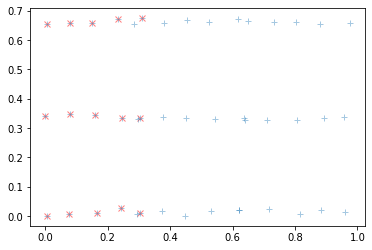

In [155]:
f,pl = plt.subplots(num='dither', clear=True)

#xTarget, yTarget = nirander.xStepToPix(frames.xstep), nirander.yStepToPix(frames.ystep)

#pl.plot(xTarget, yTarget, 'ro')
minx, miny = frames.xpix.min(), frames.ypix.min()
lineStart = frames[frames.xstep == frames.xstep.min()]
pl.plot(lineStart.xpix - minx, lineStart.ypix - miny, 'rx', alpha=0.5)
pl.plot(frames.xpix - minx, frames.ypix -  miny, '+', alpha=0.4)


In [156]:
f.savefig('n1_dither_repeats.pdf')

In [259]:
nirander.measureSet(frames, hxCalib, center=[[2250,2040]])

got 46 spots near [[2250, 2040]]
got 46 spots near [[2250, 2040]]
got 45 spots near [[2250, 2040]]


KeyboardInterrupt: 

In [264]:
vl = 7823,7824, 7825

dispVisits(vl, hxCalib, d1)